<table>
    <tr>
        <td><img src="./img/Macc.png" width="auto"/></td>
        <td>
            <table><tr>
            <h1 style="color:blue;text-align:center">Lógica para Ciencias de la Computación</h1></td>
            </tr></table>   
        <td>&nbsp;</td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Taller</p></tp>
            <tp><p style="font-size:150%;text-align:center">Clasificación de fórmulas</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Objetivos <a class="anchor" id="inicio"></a>

En este notebook vamos a utilizar las herramientas de evaluación del valor de verdad de una fórmula que hemos desarrollado hasta ahora, para clasificarla dentro de una de las categorías que aprendimos en clase. A saber, fórmulas válidas, satisfacibles, falseables, contingentes e inválidas.

# Secciones

1. [SATproblem.](#sat)
2. [Clasificación de fórmulas.](#clas)
3. [Implicación lógica.](#imp)
4. [Eficiencia de los algoritmos (opcional).](#efi)

# SATproblem <a class="anchor" id="sat"></a>

([Volver al inicio](#inicio))

Hemos visto que una fórmula $A$ es satisacible sii existe una interpretación $I$ tal que $A$.valor$(I)=\texttt{True}$. En lógica computacional, determinar si una fórmula $A$ es satisfacible se conoce como el SATproblem. En teoría de la complejidad, este problema es importante, toda vez que fue el primer problema que se demostró que es NP-completo. Pero esto es parte de otro curso. Para nosotros el SATproblem es importante porque su solución será la base tanto para la clasificación de fórmulas como para la resolución de problemas. 

Los algoritmos que, dada una fórmula $A$, búscan una interpretación $I$ tal que $A$.valor$(I)=\texttt{True}$, se conocen como SATsolvers. En este notebook construiremos el primer SATsolver con base en las herramientas que tenemos a nuestra disposición.

**Ejercicio 1:** 

Implemente un método `SATtabla` el cual, dada una fórmula $A$, devuelve una interpretación $I$ tal que $A$.valor$(I)=\texttt{True}$, si es que $A$ es satisfacible. Si no, `SATtabla` debe devolver `None`. Realice este método recorriendo las interpretaciones posibles de la fórmula una a una hasta encontrar una que la haga verdadera.

Verifique su implementación para corroborar que las siguientes fórmulas son satisfacibles:

**Nota importante:** Estas fórmulas usan simplificación de paréntesis. No olvide que para usar `inorder_to_tree` todos los paréntesis deben estar incluidos.


* $\neg p\wedge q$
* $\bigl(p\vee(q\wedge r)\bigr)\wedge\bigl((\neg p\vee \neg q)\wedge(\neg p\vee\neg r)\bigr)$
* $(\neg p\leftrightarrow (q\vee r))\wedge(\neg q\vee\neg p)\wedge (\neg r\vee p)\wedge (q\vee r\vee\neg p)$

Y que las siguientes fórmulas no son satisfacibles:

* $p\wedge (p\to\neg p)$
* $\neg(\neg(p\wedge q)\to (\neg p\vee\neg q))$
* $(p\leftrightarrow (q\to r))\wedge\neg((q\vee p)\wedge (\neg r\vee p)\wedge (\neg q\vee r\vee\neg p))$



In [27]:
from Logica import *
from itertools import product

def SATtabla(A):
    letras = A.letras()
    inter_a = list(product(*[[True, False] for i in letras]))
    I_map = []
    solutions = []
    for i in inter_a:
        I_temp = {}
        j_index = 0
        for j in letras:
            I_temp[j] = i[j_index]
            j_index += 1
        I_map.append(I_temp)
    
    for i in I_map:
        if A.valor(i):
            solutions.append(i)
    return solutions


# 1 combinacion
f3 = inorder_to_tree("d")
f5 = inorder_to_tree("e")
# 2 combinaciones
f1 = inorder_to_tree("((aY-b)O(-aYb))")
f6 = inorder_to_tree("((eY-f)O(fY-e))")
f12 = inorder_to_tree("((oY-n)O(nY-o))")
# 3 combinaciones
f4 = inorder_to_tree("((((dYf)Y-e)O((dYe)Y-f))O((eYf)Y-d))")
f8 = inorder_to_tree("((((hYi)Y-j)O((hYj)Y-i))O((jYi)Y-h))")
f10 = inorder_to_tree("((((lY-m)Y-n)O((mY-l)Y-n))O((nY-l)Y-m))")
f11 = inorder_to_tree("((((oYn)Y-m)O((oYm)Y-n))O((nYm)Y-o))")
# 6 combinaciones
f2 = inorder_to_tree("((((((((aYb)Y-c)Y-d)O(((aYc)Y-b)Y-d))O(((aYd)Y-c)Y-b))O(((bYc)Y-d)Y-a))O(((bYd)Y-c)Y-a))O(((cYd)Y-a)Y-b))")
# 10 combinaciones
f7 = inorder_to_tree("(((((((((((((eYf)Yg)Y-h)Y-i)O((((eYf)Yh)Y-g)Y-i))O((((eYf)Yi)Y-h)Y-g))O((((eYh)Yg)Y-f)Y-i))O((((eYi)Yg)Y-h)Y-f))O((((eYh)Yi)Y-f)Y-g))O((((hYf)Yg)Y-e)Y-i))O((((gYf)Yi)Y-e)Y-h))O((((fYh)Yi)Y-e)Y-g))O((((gYh)Yi)Y-e)Y-f))")
f9 = inorder_to_tree("(((((((((((((iYj)Y-k)Y-l)Y-m)O((((iYk)Y-j)Y-l)Y-m))O((((iYl)Y-j)Y-k)Y-m))O((((iYm)Y-k)Y-l)Y-j))O((((kYj)Y-i)Y-l)Y-m))O((((lYj)Y-k)Y-i)Y-m))O((((mYj)Y-k)Y-l)Y-i))O((((kYl)Y-i)Y-j)Y-m))O((((kYm)Y-i)Y-l)Y-j))O((((lYm)Y-i)Y-j)Y-k))")

#unidos
fx = Binario("Y", Binario("Y", Binario("Y", Binario("Y", Binario("Y", Binario("Y", Binario("Y", Binario("Y", Binario("Y", Binario("Y", Binario("Y", f1,f2),f3),f4),f5),f6),f7),f8),f9),f10),f11), f12)

for i in SATtabla(fx):
    print(i)

{'k': False, 'i': True, 'd': True, 'c': False, 'm': True, 'g': False, 'a': True, 'n': False, 'l': False, 'o': True, 'f': False, 'e': True, 'j': False, 'b': False, 'h': True}
{'k': False, 'i': True, 'd': True, 'c': False, 'm': True, 'g': False, 'a': False, 'n': False, 'l': False, 'o': True, 'f': False, 'e': True, 'j': False, 'b': True, 'h': True}
{'k': False, 'i': False, 'd': True, 'c': False, 'm': True, 'g': True, 'a': True, 'n': False, 'l': False, 'o': True, 'f': False, 'e': True, 'j': True, 'b': False, 'h': True}
{'k': False, 'i': False, 'd': True, 'c': False, 'm': True, 'g': True, 'a': False, 'n': False, 'l': False, 'o': True, 'f': False, 'e': True, 'j': True, 'b': True, 'h': True}


---

# Clasificación de fórmulas <a class="anchor" id="clas"></a>

([Volver al inicio](#inicio))

En clase vimos la siguiente clasificación de una fórmula $A$, con base en la cantidad de interpretaciones que la hacen verdadera:

<img src="./img/clasificacion.png" width="auto"/>



**Ejercicio 2:**

Complete el siguiente diagrama de flujo que permite realizar la clasificación "$A$ es válida", "$A$ es insatisfacible", "$A$ es contingente", el cual está basado en el uso de un SATsolver para decidir si una fórmula es satisfacible o no:

<img src="./img/flow1.png" width="auto"/>

---

**Ejercicio 3:**

Utilice `if`s anidados para implementar el anterior diagrama de flujo en un método `clasifica` de la clase `Formula` que devuelve un string "Válida", "Insatisfacible" o "Contingente" de acuerdo a como corresponda.

Compruebe su implementación con las siguientes fórmulas:

* $p\wedge (p\to\neg p)$ es insatisfacible.
* $p\to (\neg p\to q)$ es válida.
* $p\wedge (q\to \neg p)$ es contingente.

In [31]:
from itertools import product

def SATtabla(A):
    letras = A.letras()
    inter_a = list(product(*[[True, False] for i in letras]))
    I_map = []
    for i in inter_a:
        I_temp = {}
        j_index = 0
        for j in letras:
            I_temp[j] = i[j_index]
            j_index += 1
        I_map.append(I_temp)
    
    for i in I_map:
        if A.valor(i):
            return i
    return None

def clasifica(self):
    if SATtabla(self):
        if SATtabla(Negacion(self)):
            return "Contingente"
        else:
            return "Valida"
    else:
        return "Insatisfacible"
    
setattr(Formula, "clasifica", clasifica)

formula1 = inorder_to_tree("(p>(-p>q))") # valida
formula2 = inorder_to_tree("(pY(q>-p))") # contingente
formula3 = inorder_to_tree("(pY(p>-p))") # insatisfacible

print(formula1.clasifica())
print(formula2.clasifica())
print(formula3.clasifica())

Valida
Contingente
Insatisfacible


---

# Implicación lógica <a class="anchor" id="imp"></a>

([Volver al inicio](#inicio))

Recordemos que en clase vimos la siguiente definición de implicación lógica:

$U\models B$ sii para toda interpretación $I$, si $A_i.\mbox{valor}(I)=\texttt{True}$ para todo $A_i\in U$,        entonces $B.\mbox{valor}(I)=\texttt{True}$.

También mencionamos que para verificar si hay o no implicación, es muy útil usar el siguiente teorema:

*Proposición* Sea $B$ una fórmula y $U=\{A_1,\ldots,A_n\}$ un conjunto de fórmulas:

$U\models B$ sii $\bigl(A_1\wedge\ldots\wedge A_n\bigr)\to B$ es válida.

**Ejercicio 4:**

Complete el siguiente diagrama de flujo para determinar si hay implicación lógica entre un conjunto de fórmulas $U$ y una fórmula $B$ con base en un SATsolver.

<img src="./img/flow_imp.png" width="auto"/>

---

**Ejercicio 5:**

Implemente una función `imp_log` que recibe como argumentos una lista de fórmulas `[A1,...,An]` y una fórmula `B` y devuelve verdadero sii $\{A_1,\ldots,A_n\}\models B$.

Compruebe su código con las siguientes implicaciones:

* $U\,{=}\,\{p, \neg q\}$; $B\,{=}\,\neg(p\to q)$.
* $U\,{=}\,\{p\to q, \neg r, q\to r\}$; $B\,{=}\,\neg p$.
* $U\,{=}\,\{r\vee s, \neg s\wedge\neg r, p\vee q, p\to q, r\to s\}$; $B\,{=}\,\neg p\wedge\neg q$.

Y compruebe que las siguientes no son implicaciones:

* $U\,{=}\,\{p\wedge r,\ (p\wedge q)\rightarrow\lnot r \}$; $B\,{=}\, q$
* $U\,{=}\,\{p\rightarrow q,\ p\wedge(q\rightarrow r),\ r\rightarrow s \}$; $B\,{=}\,p\wedge\lnot s$

In [52]:
from Logica import *
from itertools import product

def SATtabla(A):
    letras = A.letras()
    inter_a = list(product(*[[True, False] for i in letras]))
    I_map = []
    for i in inter_a:
        I_temp = {}
        j_index = 0
        for j in letras:
            I_temp[j] = i[j_index]
            j_index += 1
        I_map.append(I_temp)
    
    for i in I_map:
        if A.valor(i):
            return i
    return None


def Ycon(An): #lista con formulas a binarios de la forma conjuntiva
    if len(An) > 2:
        return Binario("Y", An[0], Ycon(An[1:]) )
    else:
        return Binario("Y", An[0], An[1])

def imp_log(An, B):
    antecedente = Ycon(An)
    print(antecedente)
    if B.valor(SATtabla(antecedente)):
        return True
    return False
    
#formulas
p = Letra("p")
q = Letra("q")
r = Letra("r")
s = Letra("s")
ptq = Binario(">", p, q)

#imp 1
A1 = [p,Negacion(q)]
B1 = inorder_to_tree("-(p>q)")
print(imp_log(A1, B1))

#imp 2
A2 = [ptq, Negacion(r), Binario(">", q, r)]
B2 = Negacion(p)
print(imp_log(A2, B2))

#no imp 1
A3 = [Binario("Y",p,r), Binario(">", Binario("Y",p,q), Negacion(r))]
B3 = q
print(imp_log(A3, B3))

#no imp 2
A4 = [ptq,Binario("Y", p, Binario(">", q, r)) ,Binario(">", r, s)]
B4 = Binario("Y", p, Negacion(s))
print(imp_log(A4, B4))

(pY-q)
True
((p>q)Y(-rY(q>r)))
True
((pYr)Y((pYq)>-r))
False
((p>q)Y((pY(q>r))Y(r>s)))
False


---

# Sección opcional: Eficiencia de los algoritmos <a class="anchor" id="efi"></a>


([Volver al inicio](#inicio))

Hemos afirmado anteriormente que la eficiencia de los algoritmos es un tema central en las ciencias de la computación. Vamos a comprobar que nuestro SATsolver hasta el momento tiene un comportamiento exponencial de tiempo de ejecución con base en el número de letras proposicionales distintas que haya en la fórmula de entrada. Así pues, vamos a ver que el tiempo que demora el método `SATtabla` al correr sobre una fórmula `A` depende de manera exponencial en el tamaño de `A.letras()`.

Definimos nuestras funciones para medir tiempos en una lista de entradas: 

In [80]:
from time import time
import seaborn as sns
import pandas as pd

def obtiene_tiempos(fun, args, num_it=100):
    tiempos_fun = []
    for i in range(num_it):
        arranca = time()
        x = fun(*args)
        para = time()
        tiempos_fun.append(para - arranca)
    return tiempos_fun

def compara_entradas(fun, lista_args, N=100):
    entradas = []
    tiempos = []
    for i, args in enumerate(lista_args):
        t = obtiene_tiempos(fun, [args], N)
        tiempos += t
        n = len(t)
        entradas += [i+1]*n
    df = pd.DataFrame({'Long_entrada':entradas, 'Tiempo_prom':tiempos})
    print(df.head())
    sns.lineplot(x='Long_entrada',y='Tiempo_prom',data=df)
    plt.show()

Creamos nuestra lista de fórmulas:

In [83]:
from random import uniform, choice

cantidad = 20
letras = [chr(i) for i in range(256, 256+cantidad)]
lista = [letras[0]]
formula = letras[0]
for p in letras[1:]:
    neg = '-' if uniform(0,1) > .5 else ''
    conectivo = choice(['Y','O','>','='])
    formula = "(" + formula + conectivo + neg + p + ")"
    lista.append(formula)

lista

['Ā',
 '(ĀY-ā)',
 '((ĀY-ā)O-Ă)',
 '(((ĀY-ā)O-Ă)Yă)',
 '((((ĀY-ā)O-Ă)Yă)Y-Ą)',
 '(((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)',
 '((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)',
 '(((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)',
 '((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)',
 '(((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)',
 '((((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)=-Ċ)',
 '(((((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)=-Ċ)Oċ)',
 '((((((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)=-Ċ)Oċ)O-Č)',
 '(((((((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)=-Ċ)Oċ)O-Č)Y-č)',
 '((((((((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)=-Ċ)Oċ)O-Č)Y-č)O-Ď)',
 '(((((((((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)=-Ċ)Oċ)O-Č)Y-č)O-Ď)>-ď)',
 '((((((((((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)=-Ċ)Oċ)O-Č)Y-č)O-Ď)>-ď)Y-Đ)',
 '(((((((((((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)=-Ċ)Oċ)O-Č)Y-č)O-Ď)>-ď)Y-Đ)=-đ)',
 '((((((((((((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)=-Ċ)Oċ)O-Č)Y-č)O-Ď)>-ď)Y-Đ)=-đ)=Ē)',
 '(((((((((((((((((((ĀY-ā)O-Ă)Yă)Y-Ą)Oą)OĆ)Oć)>Ĉ)=-ĉ)=-Ċ)Oċ)O-Č)Y-č)O-Ď)>-ď)Y-Đ)=-đ)=Ē)>-ē)']

Y, finalmente, medimos los tiempos de ejecución para cada fórmula:

   Long_entrada  Tiempo_prom
0             1     0.000036
1             1     0.000010
2             1     0.000007
3             1     0.000006
4             1     0.000007


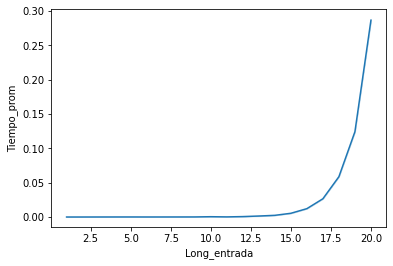

In [84]:
fun = lambda formula: inorder_to_tree(formula).SATtabla()
compara_entradas(fun, lista)

En esta gráfica es muy fácil apreciar que, a medida que aumentamos el número de letras proposicionales distintas en la fórmula de entrada, el algoritmo se tarda cada vez más en determinar si ella es satisfacible. Más aún, la relación entre el número de letras y el tiempo es claramente exponencial.

Como conclusión, vemos que si necesitamos una gran cantidad de letras proposicionales, nuestro SATsolver `SATtabla` resultará completamente ineficiente.

---